Image Captcha is python library to create captcha.
```python
pip install captcha
```
We will use this library and create a CNN to predict the captcha
#### Let's import libraries


In [1]:
from captcha.image import ImageCaptcha
import numpy as np
import os
from PIL import Image
import random
from matplotlib.pyplot import imshow
%matplotlib inline

In [2]:
num_alpha=['0','1','2','3','4','5','6','7','8','9',
           'q','w','e','r','t','y','u','i','o','p',
           'a','s','d','f','g','h','j','k','l','z',
           'x','c','v','b','n','m',
           'Q','W','E','R','T','Y','U','I','O','P',
           'A','S','D','F','G','H','J','K','L','Z',
           'X','C','V','B','N','M']
#tol num = training set + test set +validation set
height = 60
width = 160

In [3]:
def random_captcha_text(char_set=num_alpha, captcha_size=6):
    captcha_text = []
    for i in range(captcha_size):
        c = random.choice(char_set)
        captcha_text.append(c)
    return captcha_text

In [4]:
def gen_captcha_text_and_image(i):
    image = ImageCaptcha(width=160,height=60,font_sizes=[30])
    
    captcha_text = random_captcha_text()
    captcha_text = ''.join(captcha_text)
    
    captcha = image.generate(captcha_text)
        
    captcha_image=Image.open(captcha)
    
    if i == 0:
        print('printing 1st captcha')
        imshow(np.asarray(captcha_image) )
        
    captcha_arr = np.asarray(captcha_image, dtype="float32")
    #print(captcha_arr.shape)
    return captcha_text, captcha_arr

In [5]:
from tqdm import *

In [6]:
tol_num = 110

  0%|          | 0/110 [00:00<?, ?it/s]

printing 1st captcha


100%|██████████| 110/110 [00:01<00:00, 63.60it/s]


-----------captchas generated------------


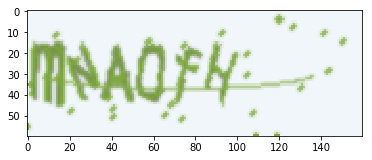

In [7]:
#y_len is length of output vector which contains 10 numbers, 26 upper case letter, 26 lower case letters multiplied by 6 captcha letter
y_len = 6*(10+26+26)
channel = 3 #RGB Image
data = np.empty((tol_num,height,width,channel),dtype="float32")
label = np.empty((tol_num,y_len),dtype="uint8")

for i in tqdm( range(tol_num) ):
    text, arr = gen_captcha_text_and_image(i)
    data[i,:,:,:] = arr
    vector = np.zeros(6*(10+26+26))
    for j,c in enumerate(text):
        idx = j*(10+26+26) + num_alpha.index(c)
        vector[idx]=1
    label[i]=vector
print('-----------captchas generated------------')
#data, shuffled and split between train and test sets



In [8]:
val_minus = tol_num-10

rr = [i for i in range(val_minus)]
random.shuffle(rr)


In [9]:
train_num=80

X_train = data[rr][:train_num]

In [10]:

y_train = label[rr][:train_num]


In [11]:
X_test = data[rr][train_num:]


In [12]:
y_test = label[rr][train_num:]



In [13]:
val_set = data[(val_minus+1):]


In [14]:
X_train.shape

(80, 60, 160, 3)

# Lets create the model

In [15]:
from keras.models import Sequential 
from keras.layers import Dense, Flatten, MaxPooling2D, Convolution2D, Dropout

Using TensorFlow backend.


In [16]:
captcha_cnn = Sequential([
    Convolution2D(64,8,8,input_shape=(height,width,channel), activation='relu'),
    MaxPooling2D(pool_size=(2,2) ),
    Dropout(0.25),
    
    Convolution2D(128,4,4,activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Convolution2D(128,2,2,activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(500,activation='relu'),
    Dense(250,activation='relu'),
    Dense(6*(10+26+26), activation='softmax')
])

C:\Users\Chaitra\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (8, 8), activation="relu", input_shape=(60, 160, ...)`
  
C:\Users\Chaitra\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu")`
  
C:\Users\Chaitra\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (2, 2), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.


In [17]:
captcha_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 53, 153, 64)       12352     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 76, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 76, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 73, 128)       131200    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 36, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 11, 36, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 35, 128)       65664     
__________

In [18]:
captcha_cnn.compile(loss='categorical_crossentropy', optimizer='rmsprop')

In [19]:
captcha_cnn.fit(X_train,y_train, 
          epochs=1, 
          batch_size=3, 
          validation_data=(X_test,y_test)
         )

Train on 80 samples, validate on 20 samples
Epoch 1/1
80/80 [==============================] - ETA: 356s - loss: 96.70 - ETA: 172s - loss: 96.70 - ETA: 111s - loss: 96.70 - ETA: 80s - loss: 96.7086 - ETA: 62s - loss: 96.708 - ETA: 49s - loss: 96.708 - ETA: 40s - loss: 96.708 - ETA: 34s - loss: 96.708 - ETA: 28s - loss: 96.708 - ETA: 24s - loss: 96.708 - ETA: 21s - loss: 96.708 - ETA: 18s - loss: 96.708 - ETA: 15s - loss: 96.708 - ETA: 13s - loss: 96.708 - ETA: 11s - loss: 96.708 - ETA: 10s - loss: 96.708 - ETA: 8s - loss: 96.708 - ETA: 7s - loss: 96.51 - ETA: 6s - loss: 96.52 - ETA: 5s - loss: 96.53 - ETA: 4s - loss: 96.28 - ETA: 3s - loss: 96.06 - ETA: 2s - loss: 95.85 - ETA: 1s - loss: 95.89 - ETA: 1s - loss: 95.92 - ETA: 0s - loss: 95.95 - 17s - loss: 95.9736 - val_loss: 96.7086


In [31]:
predict = captcha_cnn.predict(val_set)
print('len of predict',len(predict))

len of predict 9


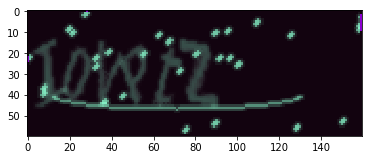

In [33]:
imshow(np.asarray(val_set[0]) )
print('the captcha that we are trying to detect')

In [34]:
predict[0].shape

(372,)

In [35]:
output = predict[0].reshape(6,int(len(predict[0])/6) )

In [39]:
out_text = []
out_idx=0
for l in range(0,6):
    for k in range(0,62):
        if output[l][k] == 1:
            out_idx=k
            out_text.append(num_alpha[out_idx])
            

print('the final captcha is:',out_text)

            

the final captcha is: ['A']


# Highly inaccurate, will train on more data